In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tc = "BE00"
scopes = {"BE00":"BE00_DE00_LUG1_FR00_UK00_NL00","SE03":"FI00_SE02_DKW1_SE04_NOS0_SE03"}
dfs_prices = dict()
fixing_methods = ["endo_invest","TYNDP","0","no_fix"]
fm = fixing_methods[0]
for fm in fixing_methods:
    dfs_prices[fm] = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_tc_{tc}_{fm}_gs_{scopes[tc]}_100.csv")

# df_prices = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_{tc}_TYNDP_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_2 = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_{tc}_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_3 = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_{tc}_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_4 = pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_{tc}_TYNDP_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
# df_prices_5= pd.read_csv(f"../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_true_tc_{tc}_0_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")

# #df_prices_2 =  pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_0_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")
#df_prices_3 =  pd.read_csv("../Results/TradeCurves/import_price_curves2025_2012_National Trends_8760_s_false_false_tc_SE03_endo_invest_gs_FI00_SE02_DKW1_SE04_NOS0_SE03_100.csv")


In [3]:
df_filtered = df_prices[filtered_columns]
mean_values = df_filtered.mean()


# Convert column names to float for plotting
import_levels = [float(col) for col in mean_values.index]

# Create a scatter plot for mean values
plt.figure(figsize=(10, 6))
plt.scatter(import_levels, mean_values.values, color='blue', alpha=0.7)
plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Mean Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

NameError: name 'df_prices' is not defined

In [4]:
import numpy as np
fm = "no_fix"
# Assuming df is your DataFrame
# Convert DataFrame to a one-dimensional Series
series = dfs_prices[fm].values.flatten()

# Get unique values
unique_values = pd.unique(series).tolist()
print(len(unique_values))

np.sort(unique_values)

494


array([0.00000000e+00, 2.34570000e-02, 4.30000000e-02, 4.69140000e-02,
       8.10000000e-02, 1.00000000e-01, 1.23457000e-01, 1.43000000e-01,
       1.46914000e-01, 1.81000000e-01, 2.00000000e-01, 2.23457000e-01,
       2.43000000e-01, 2.46914000e-01, 3.00000000e-01, 3.43000000e-01,
       3.46914000e-01, 4.00000000e-01, 3.12345700e+00, 3.32345700e+00,
       3.57037000e+00, 8.30809100e+00, 8.67009100e+00, 8.70809100e+00,
       8.78909100e+00, 8.83209100e+00, 8.90690400e+00, 8.91309100e+00,
       8.95109100e+00, 9.00690400e+00, 9.01309100e+00, 9.03209100e+00,
       9.10690400e+00, 9.11309100e+00, 9.14990400e+00, 9.20690400e+00,
       9.24990400e+00, 9.34990400e+00, 9.44990400e+00, 9.54990400e+00,
       1.10430910e+01, 1.10810910e+01, 1.11430910e+01, 1.11620910e+01,
       1.11810910e+01, 1.12430910e+01, 1.12620910e+01, 1.12810910e+01,
       1.13240910e+01, 1.13430910e+01, 1.13620910e+01, 1.13810910e+01,
       1.14050910e+01, 1.14240910e+01, 1.14430910e+01, 1.14620910e+01,
      

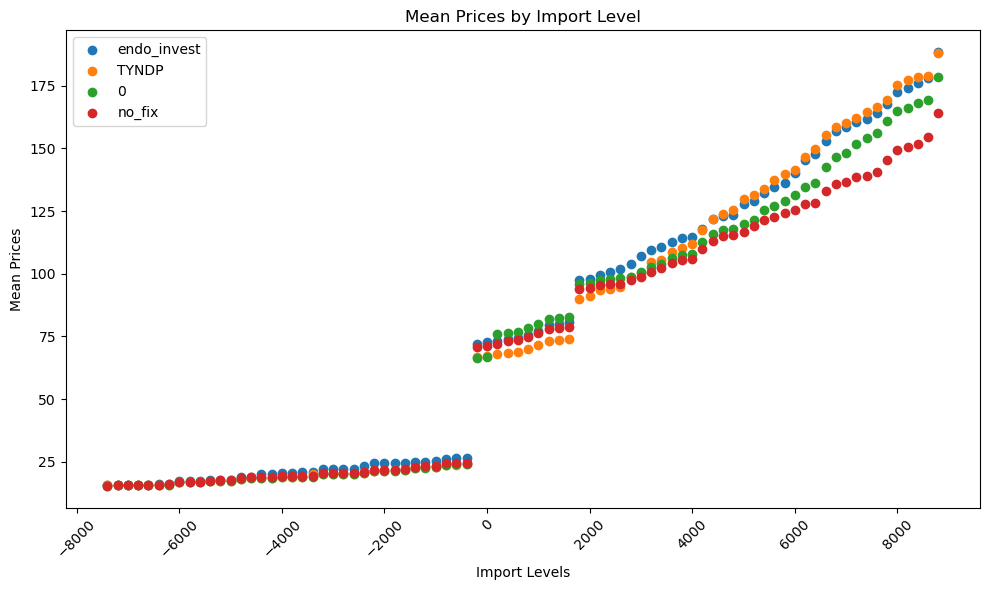

In [27]:
plt.figure(figsize=(10, 6))

# Loop through each DataFrame and plot mean values
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 200 == 0) & (abs(float(col)) <= 10000)]
    df_filtered = df[filtered_columns]
    
    # Calculate mean values for each import level
    mean_values = df_filtered.mean()
    
    # Convert column names to float for plotting
    import_levels = [float(col) for col in mean_values.index]
    
    # Create scatter plot for mean values
    plt.scatter(import_levels, mean_values.values, label=i)

plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Mean Prices')
#plt.ylim((0,1000))
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend()
plt.tight_layout()
# plt.show()
plt.savefig("../Results/Figures/FY_analysis/StorageHeavy/Mean_Prices.png")

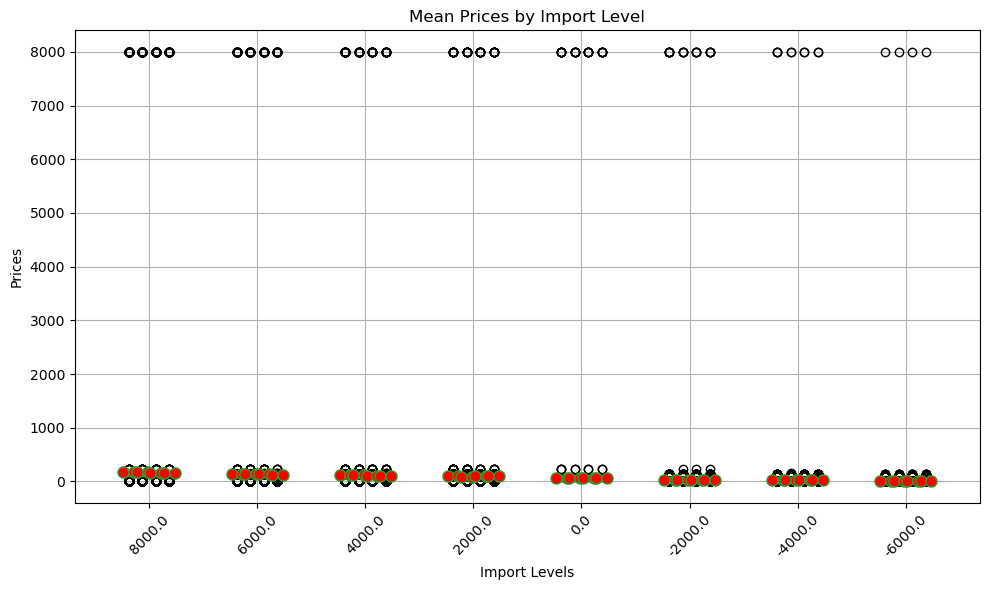

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k=0
n=8
colors = ['skyblue', 'lightgreen', 'lightcoral',"red"]  # Define colors for each DataFrame
labels = list(dfs_prices.keys())
handles = {} 
# Loop through each DataFrame and plot boxplots for each column
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 2000 == 0) & (abs(float(col)) <= 10000)]
    df_filtered = df[filtered_columns]
    
    # Create boxplot for each column
    boxplot = df_filtered.boxplot(positions=[i - 3/(2*n) + k/n for i in range(len(filtered_columns))], widths=0.1, patch_artist=True, boxprops=dict(facecolor=colors[k]), showmeans=True, meanprops=dict(marker='o', markerfacecolor='red', markersize=8), meanline=True)

    k += 1    
plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Prices')
#plt.ylim((0,400))
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()

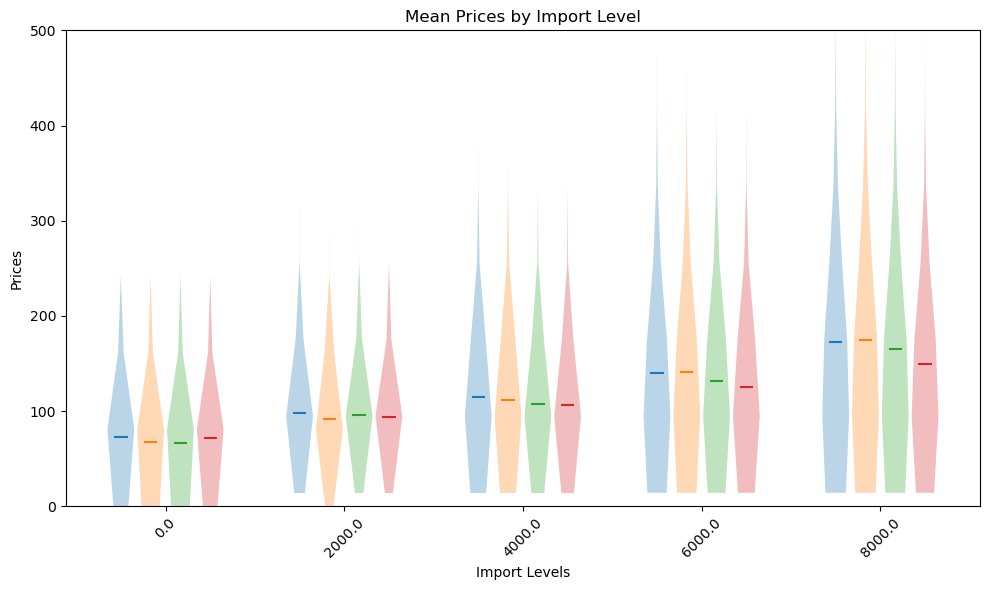

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
k=0
n=6
colors = ['skyblue', 'lightgreen', 'lightcoral',"red"]  # Define colors for each DataFrame
labels = list(dfs_prices.keys())
handles = {} 

# Loop through each DataFrame and plot boxplots for each column
for i, df in dfs_prices.items():
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns = [col for col in df.columns if (float(col) % 2000 == 0) & (0<=float(col) <= 10000)]

     # Reverse the order of filtered columns
    filtered_columns.reverse()
    df_filtered = df[filtered_columns]
    
    # Create violin plot for each column
    violinplot = plt.violinplot(dataset=[df_filtered[col].dropna() for col in df_filtered.columns],
                                positions=[i - 3/(2*n) + k/n for i in range(len(filtered_columns))],
                                widths=0.15, showmeans=True, showextrema=False, showmedians=False,points=100)
    
    k += 1    

plt.title('Mean Prices by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Prices')
plt.ylim((0,500))
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()


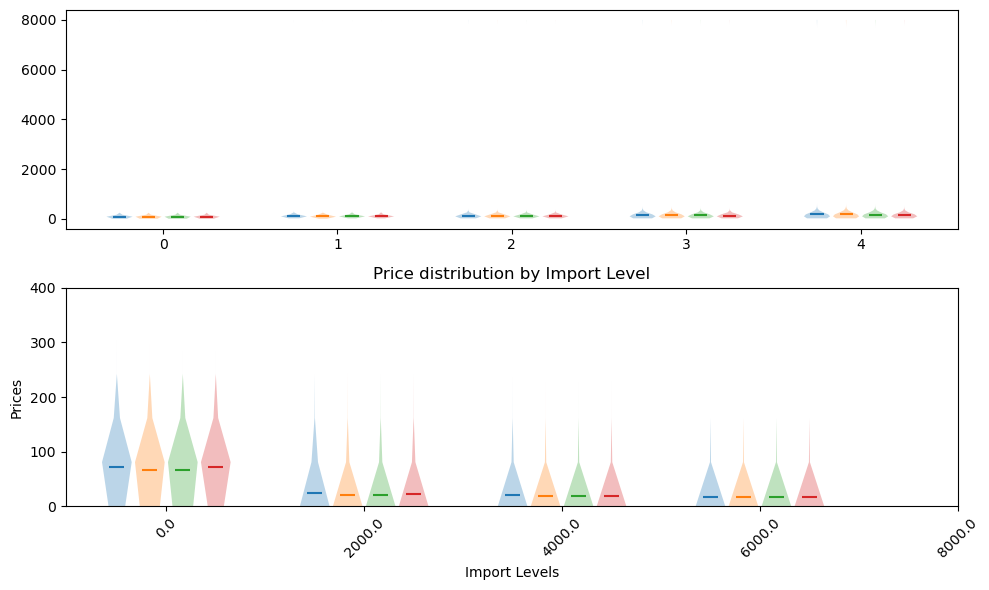

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2,1,figsize=(10, 6))
k = 0
n = 6
colors = ['skyblue', 'lightgreen', 'lightcoral', "red"]  # Define colors for each DataFrame
ax_pos = axs[0]
ax_neg = axs[1]
# Loop through each DataFrame and plot violin plots for each column
for i, df in enumerate(dfs_prices.values()):
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns_pos = [col for col in df.columns if (float(col) % 2000 == 0) & (0 <= float(col))]
    filtered_columns_neg = [col for col in df.columns if (float(col) % 2000 == 0) & (0 >= float(col))]

    
    # Reverse the order of filtered columns
    filtered_columns_pos.reverse()
    df_filtered_pos = df[filtered_columns_pos]
    df_filtered_neg = df[filtered_columns_neg]

    # Create violin plot for each column
    violinplot_pos = ax_pos.violinplot(dataset=[df_filtered_pos[col].dropna() for col in df_filtered_pos.columns],
                                positions=[i - 3/(2*n) + k/n for i in range(len(filtered_columns_pos))],
                                widths=0.15, showmeans=True, showextrema=False, showmedians=False,
                                )  # Use colors list for each violin plot
    violinplot_neg = ax_neg.violinplot(dataset=[df_filtered_neg[col].dropna() for col in df_filtered_neg.columns],
                                positions=[i - 3/(2*n) + k/n for i in range(len(filtered_columns_neg))],
                                widths=0.15, showmeans=True, showextrema=False, showmedians=False,
                                )  # Use colors list for each violin plot
    k += 1    

plt.title('Price distribution by Import Level')
plt.xlabel('Import Levels')
plt.ylabel('Prices')
plt.ylim((0, 400))
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=45)  # Set x-axis ticks and labels
plt.tight_layout()
plt.show()

ax_pos.set_title('Price distribution for import levels')
ax_pos.set_xlabel('Import Levels')
ax_pos.set_ylabel('Prices')
ax_pos.set_ylim((0, 500))
ax_pos.set_xticks(ticks=range(len(filtered_columns_pos)))
ax_pos.set_xticklabels(filtered_columns_pos, rotation=45)
ax_pos.grid(True)

# ax_neg.set_xlabel('Export Levels')
# ax_neg.set_ylim((0, 200))
# ax_neg.set_xticks(ticks=range(len(filtered_columns_neg)))
# ax_neg.set_xticklabels(filtered_columns_neg, rotation=45)
# ax_neg.grid(True)

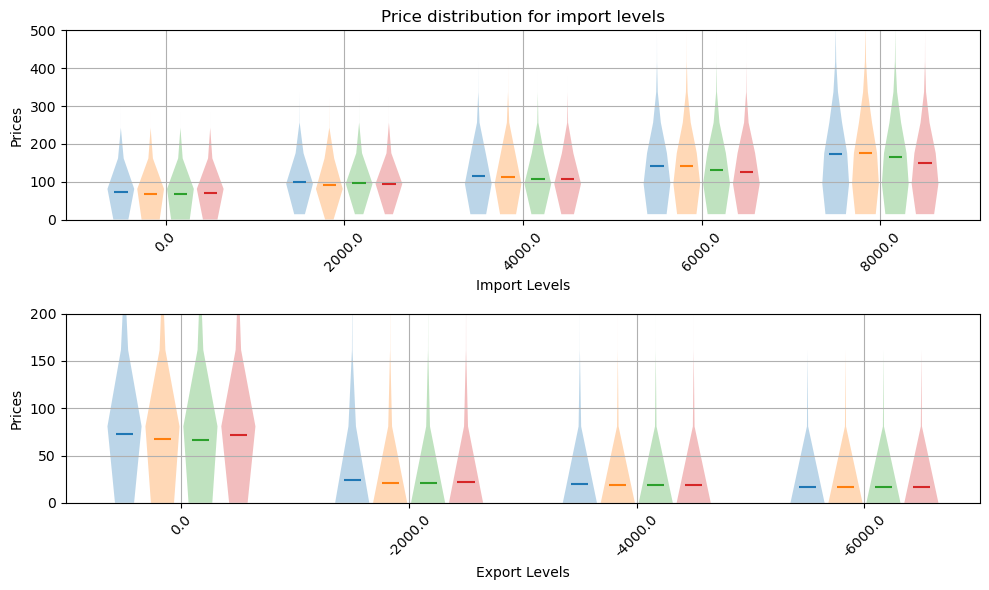

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define your data
# dfs_prices = your_data_here

fig, axs = plt.subplots(2, 1, figsize=(10, 6))
k = 0
n = 6
colors = ['skyblue', 'lightgreen', 'lightcoral', "red"]  # Define colors for each DataFrame
ax_pos = axs[0]
ax_neg = axs[1]

# Loop through each DataFrame and plot violin plots for each column
for i, df in enumerate(dfs_prices.values()):
    # Convert column names to float and filter to retain only multiples of 1000
    filtered_columns_pos = [col for col in df.columns if (float(col) % 2000 == 0) & (0 <= float(col))]
    filtered_columns_neg = [col for col in df.columns if (float(col) % 2000 == 0) & (0 >= float(col))]

    # Reverse the order of filtered columns
    filtered_columns_pos.reverse()
    df_filtered_pos = df[filtered_columns_pos]
    df_filtered_neg = df[filtered_columns_neg]

    # Create violin plot for each column
    violinplot_pos = ax_pos.violinplot(dataset=[df_filtered_pos[col].dropna() for col in df_filtered_pos.columns],
                                       positions=[i - 3 / (2 * n) + k / n for i in range(len(filtered_columns_pos))],
                                       widths=0.15, showmeans=True, showextrema=False, showmedians=False,
                                       )  # Use colors list for each violin plot
    violinplot_neg = ax_neg.violinplot(dataset=[df_filtered_neg[col].dropna() for col in df_filtered_neg.columns],
                                       positions=[i - 3 / (2 * n) + k / n for i in range(len(filtered_columns_neg))],
                                       widths=0.15, showmeans=True, showextrema=False, showmedians=False,
                                       )  # Use colors list for each violin plot
    k += 1

# Set common labels and limits
ax_pos.set_title('Price distribution for import levels')
ax_pos.set_xlabel('Import Levels')
ax_pos.set_ylabel('Prices')
ax_pos.set_ylim((0, 500))
ax_pos.set_xticks(ticks=range(len(filtered_columns_pos)))
ax_pos.set_xticklabels(filtered_columns_pos, rotation=45)
ax_pos.grid(True)

ax_neg.set_xlabel('Export Levels')
ax_neg.set_ylabel('Prices')
ax_neg.set_ylim((0, 200))
ax_neg.set_xticks(ticks=range(len(filtered_columns_neg)))
ax_neg.set_xticklabels(filtered_columns_neg, rotation=45)
ax_neg.grid(True)

plt.tight_layout()
# plt.show()
plt.savefig("../Results/Figures/FY_analysis/StorageHeavy/Price_distributions.png")

ValueError: X must have 2 or fewer dimensions

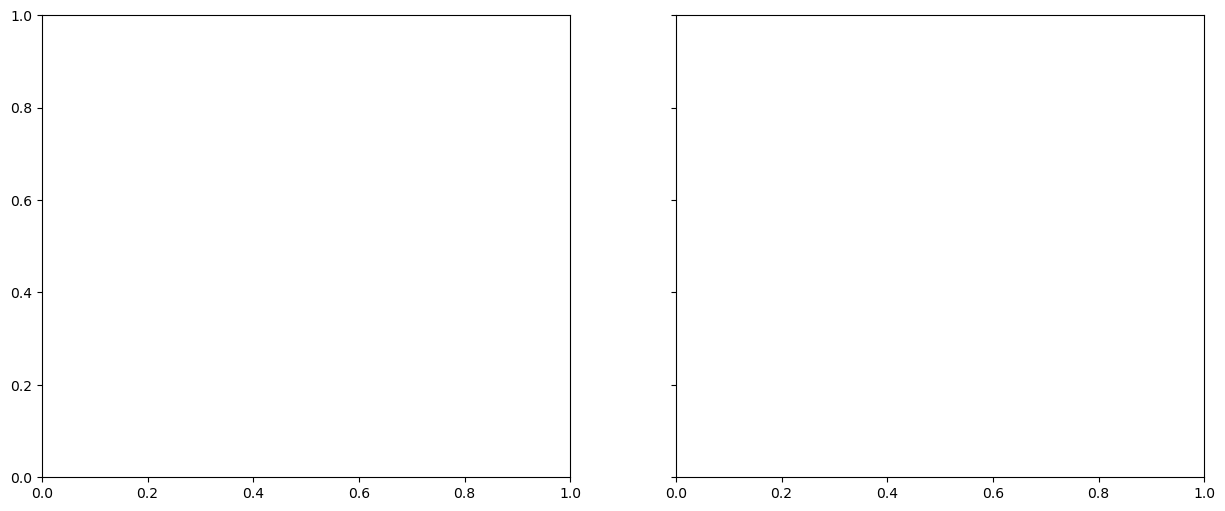

In [116]:
import matplotlib.pyplot as plt

# Split columns into positive and negative values
positive_columns = []
negative_columns = []

for df in dfs_prices.values():
    for col in df.columns:
        if float(col) >= 0:
            positive_columns.append(col)
        elif float(col) < 0:
            negative_columns.append(col)

# Reverse the order of columns for plotting
positive_columns.reverse()
negative_columns.reverse()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Plot for positive values
ax_pos = axes[0]
k = 0
for i, df in dfs_prices.items():
    df_filtered = df[positive_columns]
    violinplot = ax_pos.violinplot(dataset=[df_filtered[col].dropna() for col in df_filtered.columns],
                                   positions=[i - 3/(2*n) + k/n for i in range(len(positive_columns))],
                                   widths=0.15, showmeans=True, showextrema=False, showmedians=False,
                                   points=100)
    k += 1

ax_pos.set_title('Positive Import Levels')
ax_pos.set_xlabel('Import Levels')
ax_pos.set_ylabel('Prices')
ax_pos.set_ylim((0, 500))
ax_pos.set_xticks(ticks=range(len(positive_columns)))
ax_pos.set_xticklabels(positive_columns, rotation=45)
ax_pos.grid(True)

# Plot for negative values
ax_neg = axes[1]
k = 0
for i, df in dfs_prices.items():
    df_filtered = df[negative_columns]
    violinplot = ax_neg.violinplot(dataset=[df_filtered[col].dropna() for col in df_filtered.columns],
                                   positions=[i - 3/(2*n) + k/n for i in range(len(negative_columns))],
                                   widths=0.15, showmeans=True, showextrema=False, showmedians=False,
                                   points=100)
    k += 1

ax_neg.set_title('Negative Import Levels')
ax_neg.set_xlabel('Import Levels')
ax_neg.set_ylim((0, 500))
ax_neg.set_xticks(ticks=range(len(negative_columns)))
ax_neg.set_xticklabels(negative_columns, rotation=45)
ax_neg.grid(True)

plt.tight_layout()
plt.show()


In [136]:
1/5*4-2*0.3,1/8*4-2*0.1875

(0.20000000000000007, 0.125)

In [ ]:
1/n * 4 - 2 * x = 1/n

In [ ]:
3/n - 2x = 0 